In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [94]:
car_dataset = pd.read_csv('car data.csv')

In [95]:
car_dataset.shape

(301, 10)

In [96]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [97]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [98]:
car_dataset.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [99]:
car_dup = car_dataset.duplicated().any()
car_dup

True

In [100]:
car = car_dataset.drop_duplicates()
car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [101]:
car.shape

(299, 10)

In [102]:
car_dup = car.duplicated().any()
car_dup

False

In [103]:
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [104]:
car.Selling_Price.value_counts()

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64

<AxesSubplot:xlabel='Selling_Price', ylabel='count'>

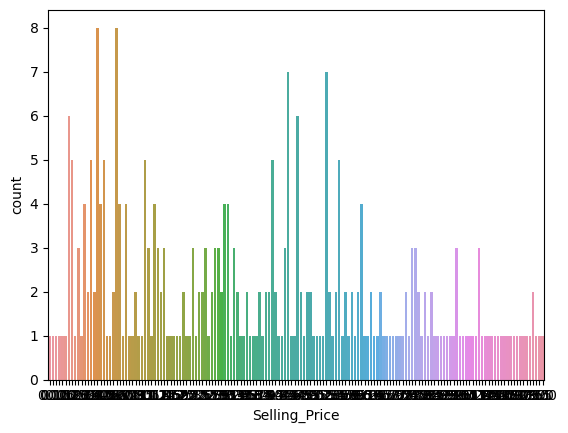

In [105]:
sns.countplot(car['Selling_Price'])

In [106]:
# Encoding the categorical Data (Fuel_Type)
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# Encoding Seller_Type
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# Encoding Transmission
car.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [107]:
car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,0,0,0,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,0,0,0,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,1,0,0,0


<AxesSubplot:xlabel='Car_Name', ylabel='Selling_Price'>

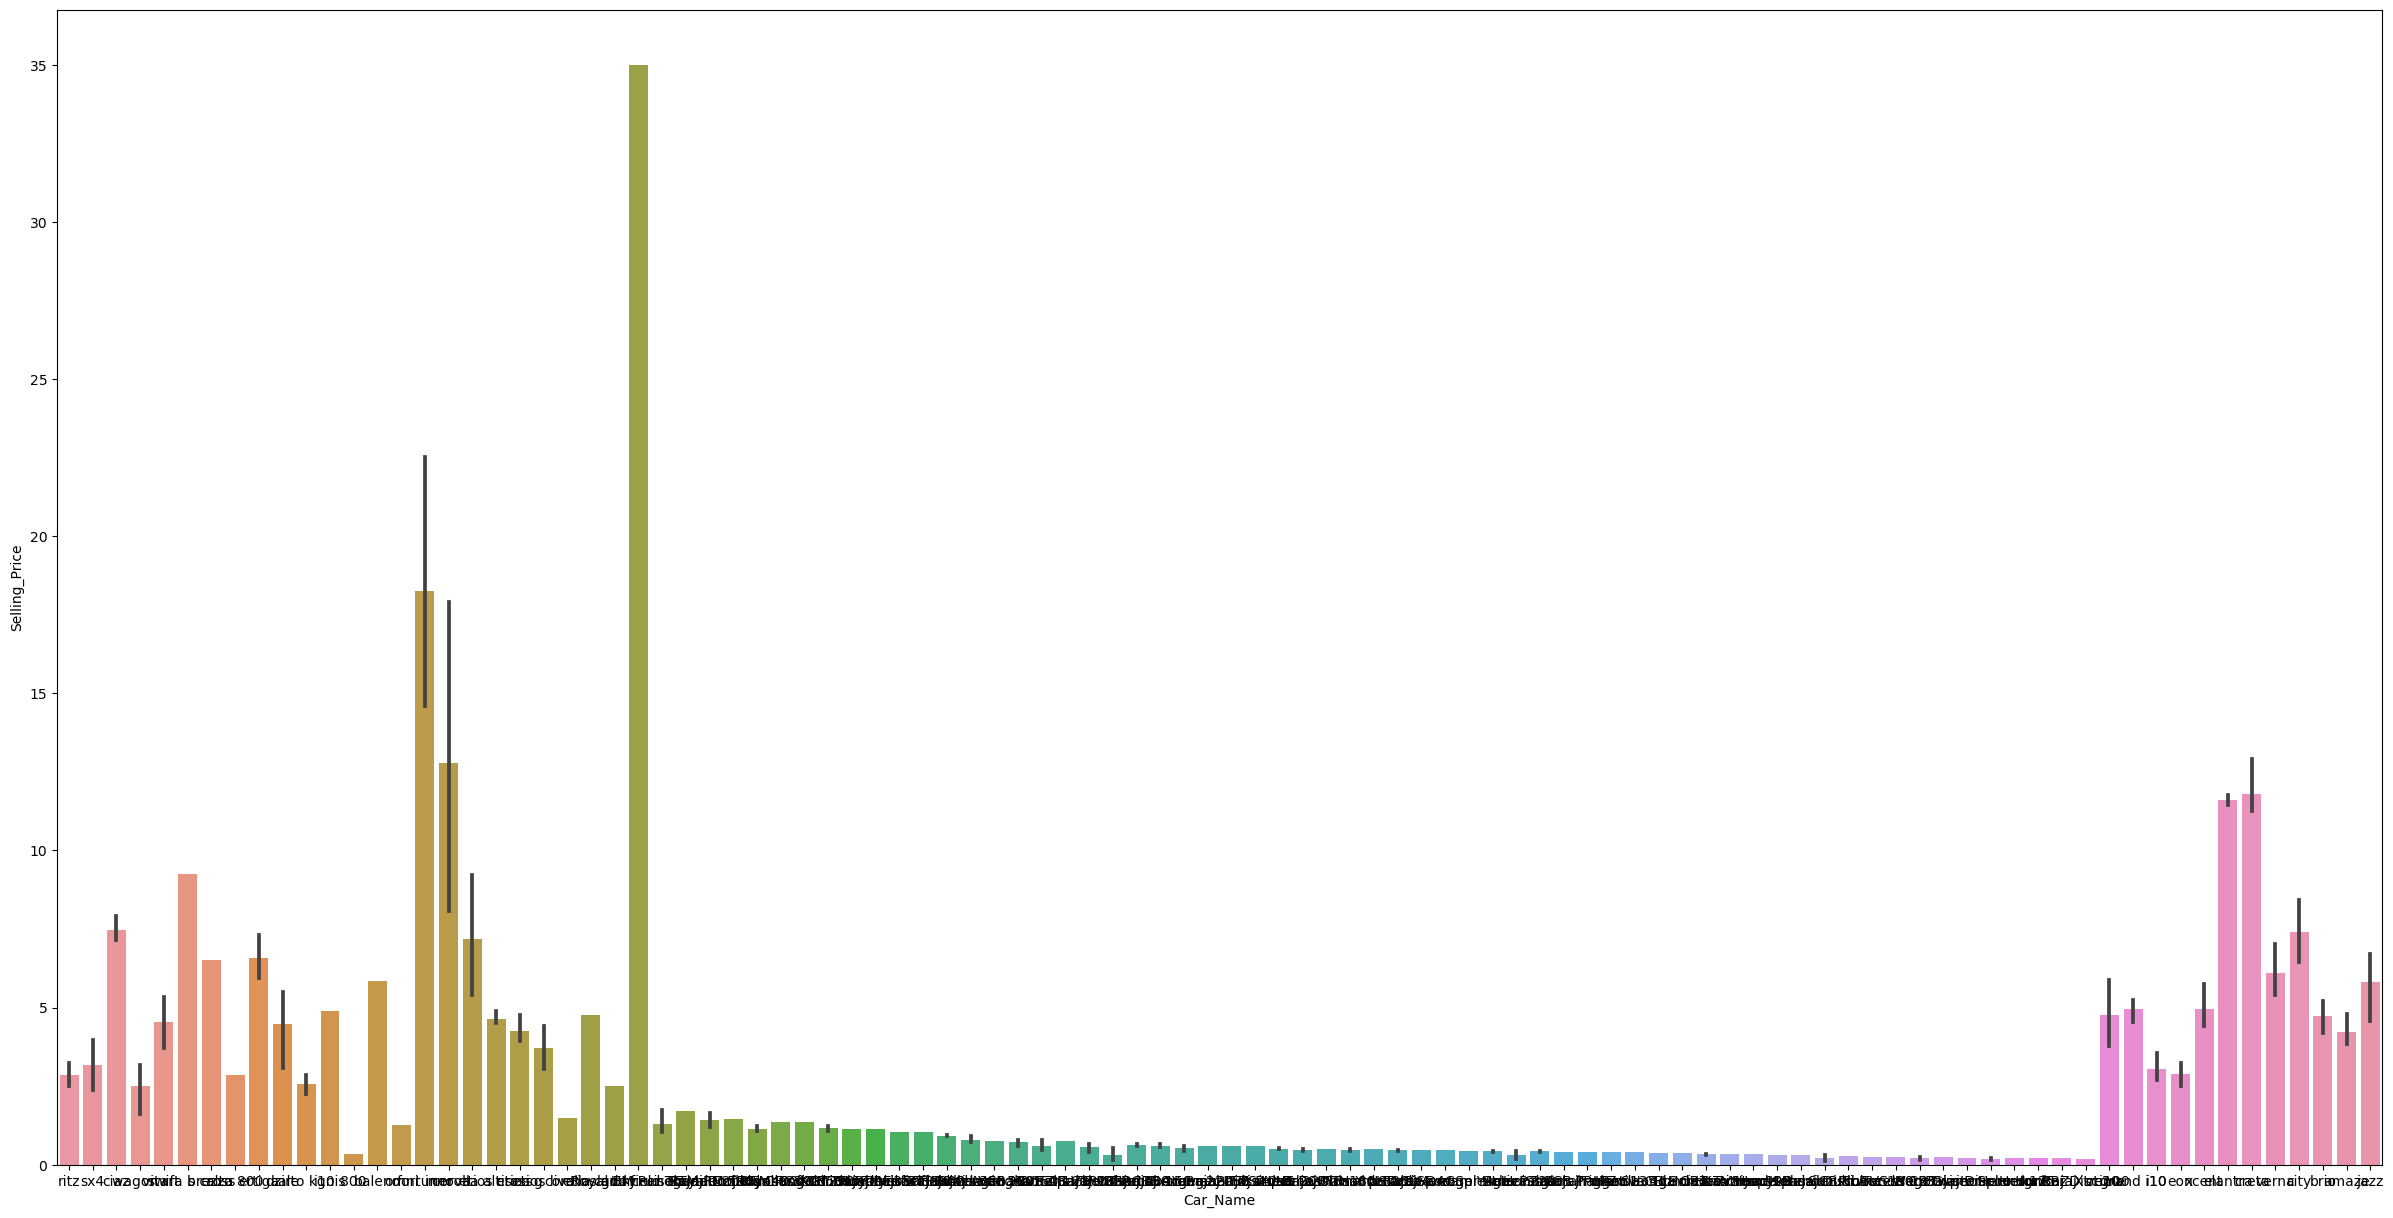

In [108]:
plt.figure(figsize=(30,15))
sns.barplot(x='Car_Name', y='Selling_Price', data=car)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

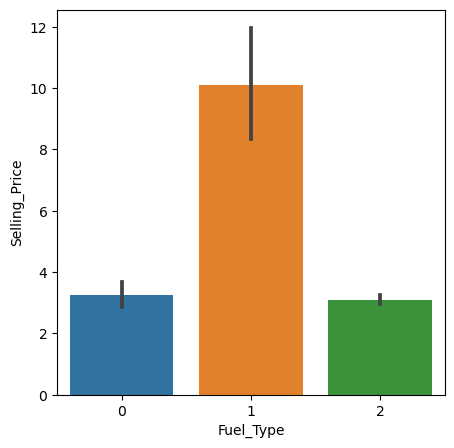

In [109]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=car)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

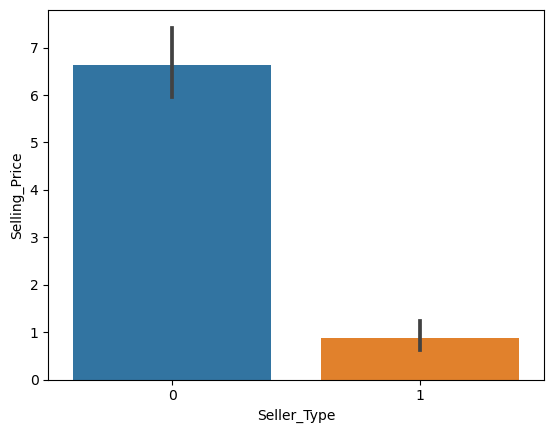

In [110]:
sns.barplot(x='Seller_Type', y='Selling_Price', data=car)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

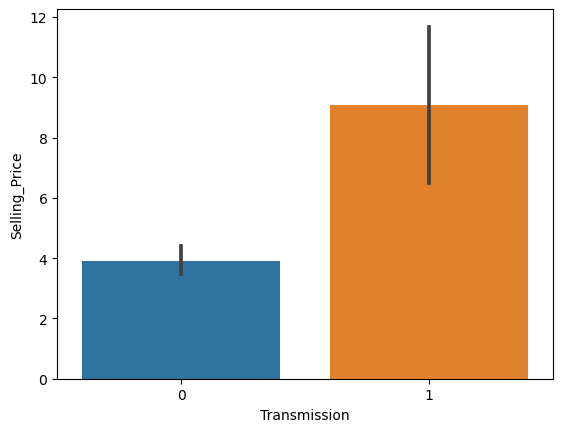

In [111]:
sns.barplot(x='Transmission', y='Selling_Price', data=car)

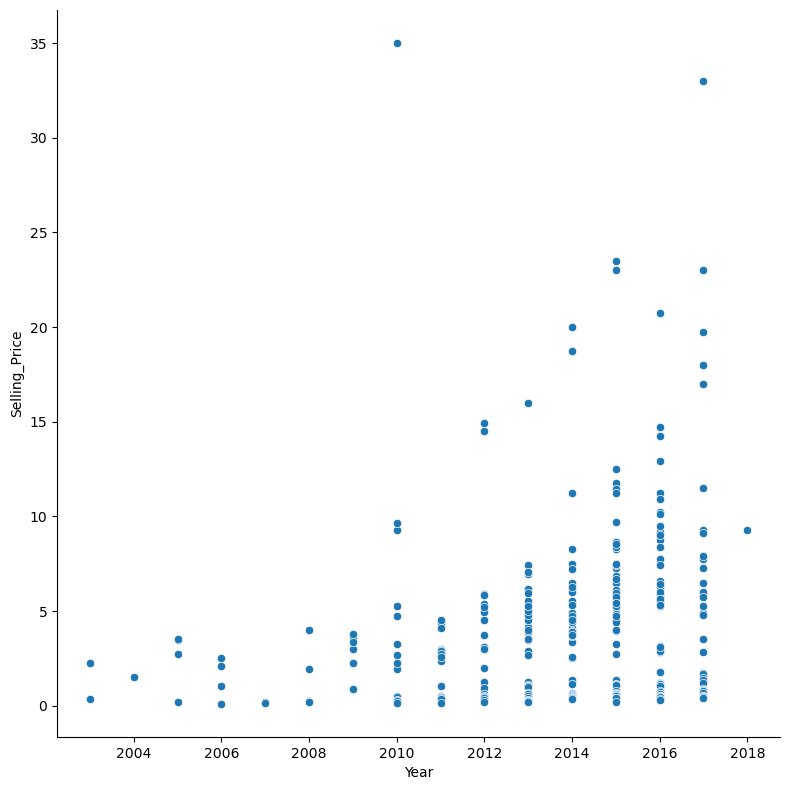

In [112]:
# Let's see how Sales are related with other variables using scatter plot.

sns.pairplot(car, x_vars=['Year'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

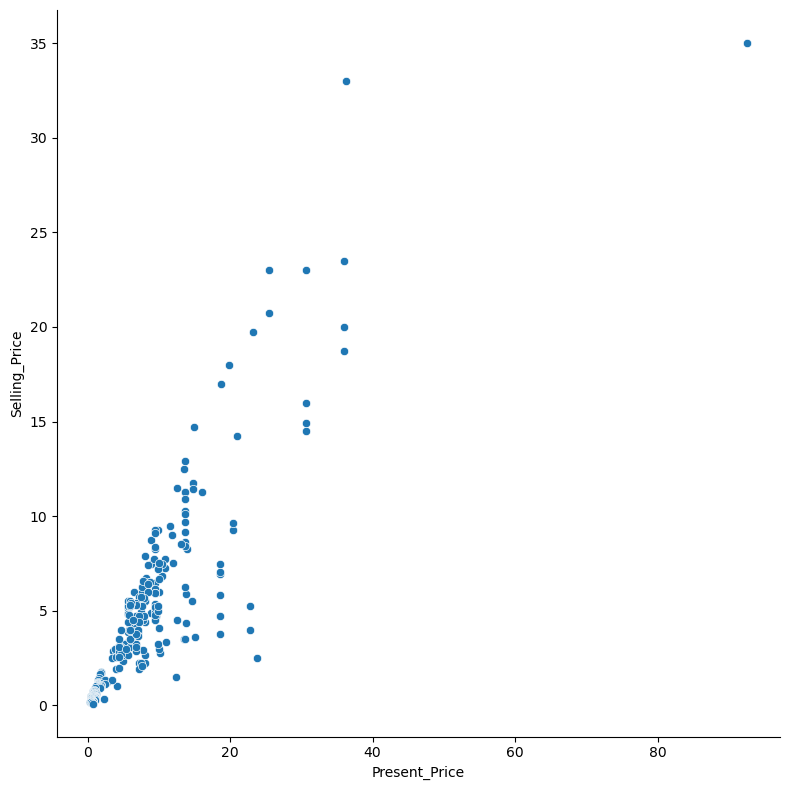

In [113]:
sns.pairplot(car, x_vars=['Present_Price'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

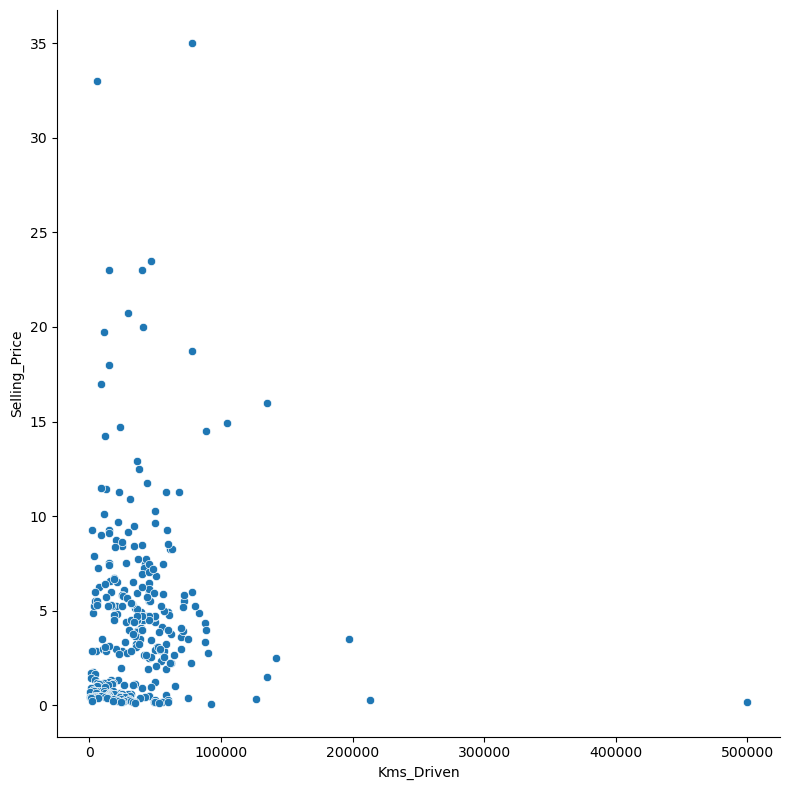

In [114]:
sns.pairplot(car, x_vars=['Kms_Driven'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

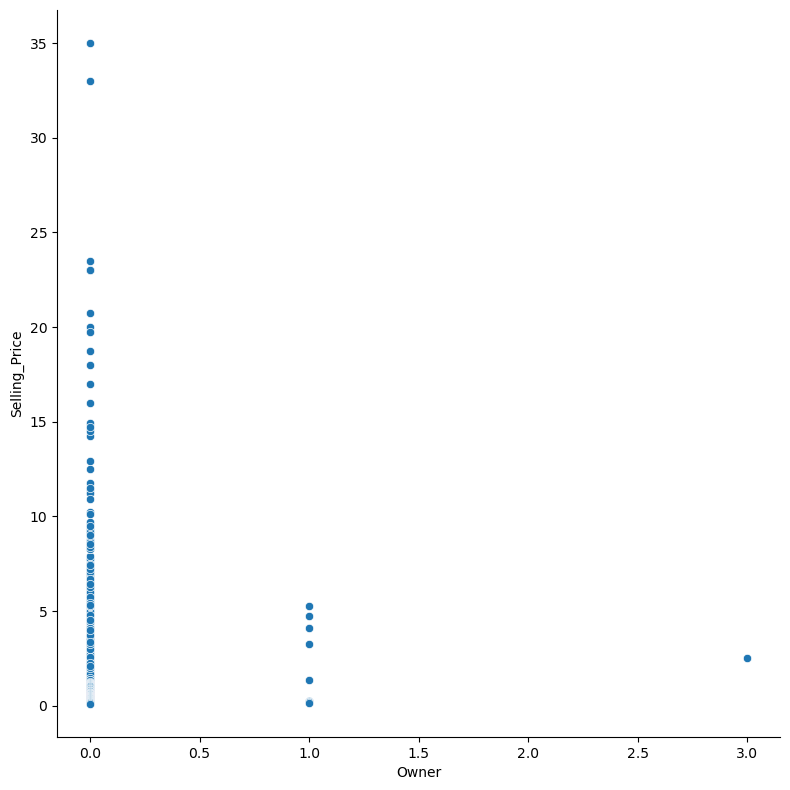

In [115]:
sns.pairplot(car, x_vars=['Owner'], y_vars='Selling_Price',height=8, aspect=1, kind='scatter')

In [116]:
# Splitting data into Training and testing data

X = car.drop(['Car_Name','Selling_Price'], axis = 1)
Y = car['Selling_Price']

In [117]:
print(X)

           company  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0    maruti suzuki  2014           5.59       27000          0            0   
1    maruti suzuki  2013           9.54       43000          1            0   
2    maruti suzuki  2017           9.85        6900          0            0   
3    maruti suzuki  2011           4.15        5200          0            0   
4    maruti suzuki  2014           6.87       42450          1            0   
..             ...   ...            ...         ...        ...          ...   
296          honda  2016          11.60       33988          1            0   
297          honda  2015           5.90       60000          0            0   
298          honda  2009          11.00       87934          0            0   
299          honda  2017          12.50        9000          1            0   
300          honda  2016           5.90        5464          0            0   

     Transmission  Owner  
0               0      0

In [118]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


In [119]:
# Splitting the data and Target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [120]:
X_train

,company,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
54,other,2005,10.21,90000,0,1,0,0
174,honda,2015,0.72,38600,0,1,0,0
24,maruti suzuki,2013,4.41,56879,0,0,0,0
100,other,2016,1.90,3000,0,1,0,0
246,hyndai,2012,6.79,35000,0,0,0,0
...,...,...,...,...,...,...,...,...
76,toyota,2013,14.68,72000,0,0,0,0
23,maruti suzuki,2014,3.46,45280,0,0,0,0
73,toyota,2011,5.71,43000,0,0,0,0
15,maruti suzuki,2016,10.79,43000,1,0,0,0


In [121]:
X_train.drop(columns=['company'], inplace=True)

In [122]:
lin_reg = LinearRegression()

In [123]:
# fit the model to the training data
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [124]:
#Print out the coefficients of the model
print(lin_reg.coef_)

[ 4.05222380e-01  4.44878551e-01 -4.43607219e-06  1.39291917e+00
 -1.03181097e+00  1.34403412e+00  6.18113334e-01]


In [125]:
#Predicton of training data
pred_train = lin_reg.predict(X_train)

In [126]:
# R^2 Error
error_score = metrics.r2_score(Y_train, pred_train)
print("R squared Error :", error_score)

R squared Error : 0.8830066323340685


In [127]:
import statsmodels.api as sm
X.drop(columns=['company'],inplace=True)
X = sm.add_constant(X)
lm_8 = sm.OLS(Y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     293.7
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          6.93e-128
Time:                        02:28:58   Log-Likelihood:                -591.94
No. Observations:                 299   AIC:                             1200.
Df Residuals:                     291   BIC:                             1229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -811.5837     86.821     -9.348

In [128]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_train, pred_train)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_train, pred_train)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_train, pred_train))))

MAE: 1.1674333150581013
MSE: 3.11278912711394
RMSE: 1.7643098160793473


Text(0, 0.5, 'actual price')

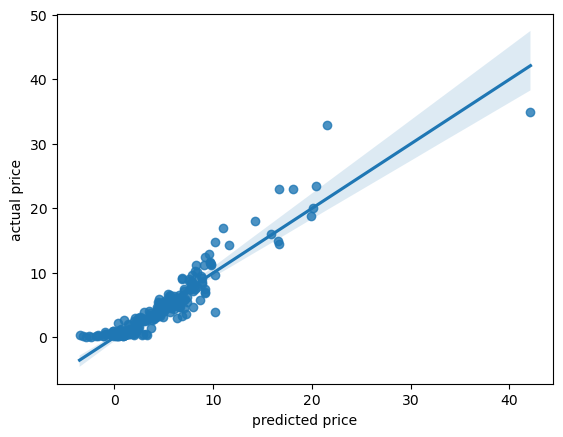

In [129]:
sns.regplot(x=pred_train,y=Y_train)
plt.xlabel("predicted price")
plt.ylabel("actual price")

In [130]:
#Predicton of training data
X_test.drop(columns=['company'],inplace=True)
pred_test = lin_reg.predict(X_test)

In [131]:
# R^2 Error
error_score = metrics.r2_score(Y_test, pred_test)
print("R squared Error :", error_score)

R squared Error : 0.7895030781336047


In [132]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, pred_test)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, pred_test)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, pred_test))))

MAE: 1.1951253620341715
MSE: 3.502744763398476
RMSE: 1.8715621184984685


Text(0, 0.5, 'actual price')

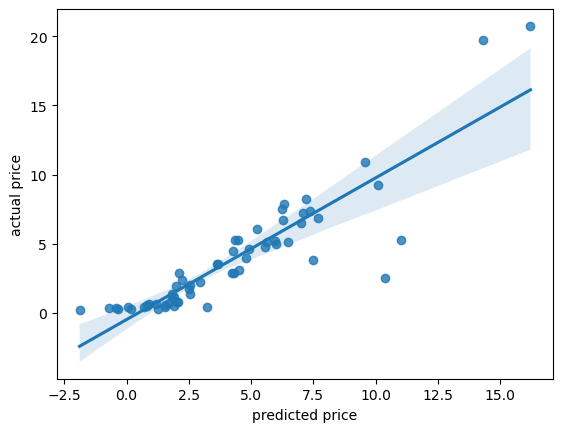

In [133]:
sns.regplot(x=pred_test,y=Y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")

In [136]:
import joblib

joblib.dump(lin_reg, 'model.pkl')

['model.pkl']